## Data Analysis

Content Analysis: The dataset provides details on various show attributes such as genre, release year, duration, and availability region. Content creators and producers can utilize this data to identify popular genres or themes that are currently in demand among Hulu's user base. It can help them make informed decisions about what type of content to produce or pitch to the platform.
</br>
Data-Source: https://www.kaggle.com/datasets/thedevastator/hulu-popular-shows-dataset
</br>
Data-Source Credit To:https://data.world/chasewillden
</br>

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
file_path = 'HuluRaw.csv'
hulu_data = pd.read_csv(file_path)

In [3]:
hulu_data.head(5)

,index,show/id,show/cache_time,show/canonical_name,show/clips_count,show/description,show/episodes_count,show/feature_films_count,show/film_clips_count,show/genre,...,show/show_rollups/showtime/html5_games_count,show/show_rollups/showtime/html5_feature_films_count,show/show_rollups/showtime/html5_film_clips_count,show/show_rollups/showtime/html5_film_trailers_count,show/show_rollups/showtime/html5_videos_count,show/show_rollups/showtime/non_rating_videos_count,show/show_rollups/showtime/highest_rating,show/annotations/0,show/annotations/1,Unnamed: 181
0,0,54,2017-08-10T14:53:04+00:00,family-guy,288,The adventures of an endearingly ignorant dad ...,288,0,0,Animation and Cartoons,...,0,0,0,0,288,0,TV-MA,NaN,NaN,NaN
1,1,6979,2017-08-10T14:14:33+00:00,south-park,3874,"Underpants-stealing gnomes, a talking Christma...",274,0,0,Comedy,...,0,0,0,0,4148,0,TV-MA,NaN,NaN,NaN
2,2,53,2017-08-10T14:46:51+00:00,american-dad,121,This screwball family full of radically differ...,172,0,0,Comedy,...,0,0,0,0,121,0,TV-14,NaN,NaN,NaN
3,3,389,2017-08-10T15:00:39+00:00,law-and-order-special-victims-unit,176,This hard-hitting and emotional series from NB...,406,0,0,Drama,...,0,0,0,0,176,0,TV-14,NaN,NaN,NaN
4,4,1603,2017-08-10T14:54:31+00:00,naruto-shippuden,16,The Village Hidden in the Leaves is home to th...,597,0,0,Anime,...,0,0,0,0,612,1,TV-14,NaN,NaN,NaN


In [4]:
hulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 183 entries, index to Unnamed: 181
dtypes: bool(6), float64(3), int64(123), object(51)
memory usage: 1.4+ MB


### Clean Data

In [5]:
# Drop columns that contain 'Unnamed'
hulu_data = hulu_data.loc[:, ~hulu_data.columns.str.contains('^Unnamed')]

In [6]:
# Drop columns that contain any NaN values
hulu_data = hulu_data.dropna(axis=1, how='all')

In [7]:
# Drop columns that contain unnesary subset of master data.

hulu_data = hulu_data.drop([col for col in hulu_data.columns if 'show_rollups' in col], axis=1)
hulu_data = hulu_data.drop([col for col in hulu_data.columns if 'show_notes' in col], axis=1)
hulu_data = hulu_data.drop([col for col in hulu_data.columns if 'annotations' in col], axis=1)

# List of the other column names you want to drop
columns_to_drop = ['show/company/key_art_url', 'show/company/network_logo_url', 'show/company/has_logo_url','show/link_description']
hulu_data = hulu_data.drop(columns=columns_to_drop, axis=1)

In [8]:
missing_data = pd.concat([hulu_data.isnull().sum(), 100 * hulu_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by=['count'])

,count,%
index,0,0.0
show/company/name,0,0.0
show/company/channel_id,0,0.0
show/company/id,0,0.0
show/available_package_ids,0,0.0
show/is_web_only,0,0.0
show/is_coppa,0,0.0
show/availability/2,0,0.0
show/availability/1,0,0.0
show/availability/0,0,0.0


In [9]:
hulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        1000 non-null   int64  
 1   show/id                      1000 non-null   int64  
 2   show/cache_time              1000 non-null   object 
 3   show/canonical_name          1000 non-null   object 
 4   show/clips_count             1000 non-null   int64  
 5   show/description             1000 non-null   object 
 6   show/episodes_count          1000 non-null   int64  
 7   show/feature_films_count     1000 non-null   int64  
 8   show/film_clips_count        1000 non-null   int64  
 9   show/genre                   1000 non-null   object 
 10  show/genres                  1000 non-null   object 
 11  show/is_movie                1000 non-null   bool   
 12  show/is_showtime_only        1000 non-null   bool   
 13  show/is_subscriber_

### Explore Data

#### What are the Interesting Aspects and popularity analysis ?

1.Number of shows per genre.</br>
2.Number of shows per company.

In [10]:
genre_counts = hulu_data['show/genre'].value_counts()
company_counts = hulu_data['show/company/short_name'].value_counts()

Text(0, 0.5, 'Genre')

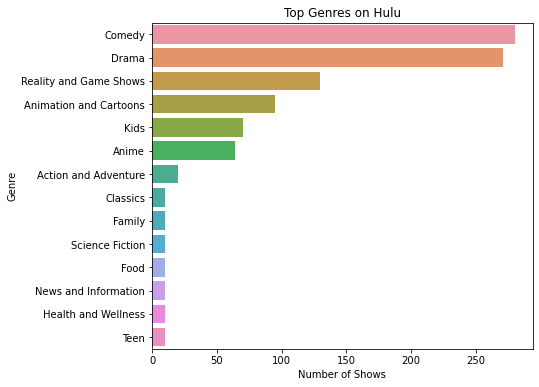

In [11]:

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top Genres on Hulu')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')


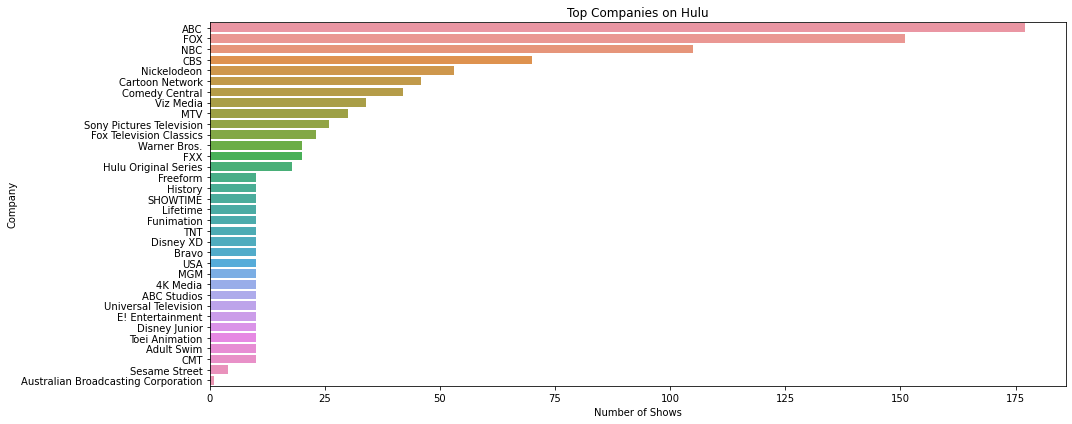

In [12]:
plt.figure(figsize=(15, 6))
sns.barplot(x=company_counts.values, y=company_counts.index)
plt.title('Top Companies on Hulu')
plt.xlabel('Number of Shows')
plt.ylabel('Company')

plt.tight_layout()
plt.show()

#### What are the content trends based on genre and rating?

1.The number of episodes per genre.</br>
2.Popularity trends based on genre.</br>
3.Popularity trends based on rating</br>

In [23]:

average_episodes_per_genre = hulu_data.groupby('show/genre')['show/episodes_count'].mean().sort_values(ascending=False)
average_episodes_per_genre.head(10)

show/genre
Anime                     484.859375
Teen                      319.000000
Science Fiction           214.000000
Classics                  180.000000
Family                    163.000000
Kids                      127.957143
Drama                      94.059041
Health and Wellness        88.000000
Animation and Cartoons     86.610526
Comedy                     84.614286
Name: show/episodes_count, dtype: float64

In [26]:

average_rating_per_genre = hulu_data.groupby('show/genre')['show/rating'].mean().sort_values(ascending=False)
average_rating_per_genre

show/genre
Action and Adventure      4.691890
Classics                  4.591255
Drama                     4.452419
Comedy                    4.387118
Science Fiction           4.315301
Anime                     4.229743
Food                      4.217084
Animation and Cartoons    4.013294
Teen                      4.002238
Family                    3.905828
Kids                      3.896697
Health and Wellness       3.884819
Reality and Game Shows    3.681237
News and Information      3.296686
Name: show/rating, dtype: float64

In [ ]:
average_length_per_genre = hulu_data.groupby('show/genre')['show/rating'].mean().sort_values(ascending=False)
average_length_per_genre

In [14]:
# Preparing data for scatterplot - relationship between number of episodes and number of seasons
scatter_data = hulu_data[['show/episodes_count', 'show/seasons_count']]

Text(0.5, 0, 'Genre')

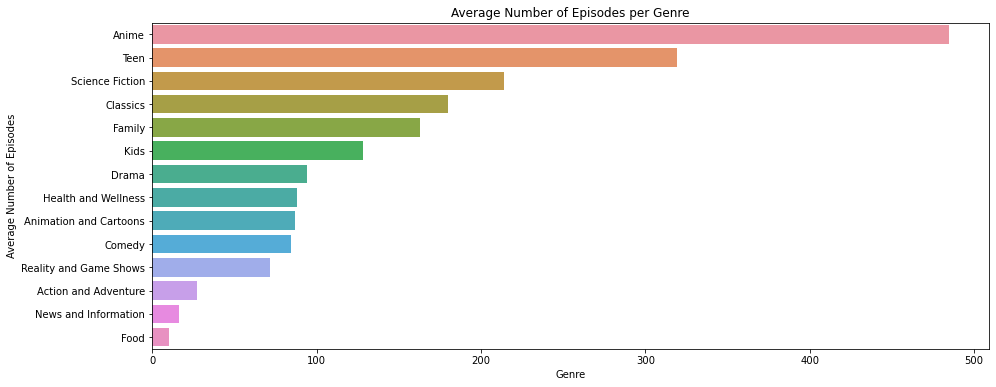

In [15]:
# Plotting
plt.figure(figsize=(15, 6))

sns.barplot(x=average_episodes_per_genre.values, y=average_episodes_per_genre.index)

    
plt.title('Average Number of Episodes per Genre')
plt.ylabel('Average Number of Episodes')
plt.xlabel('Genre')


Text(0, 0.5, 'Number of Genere')

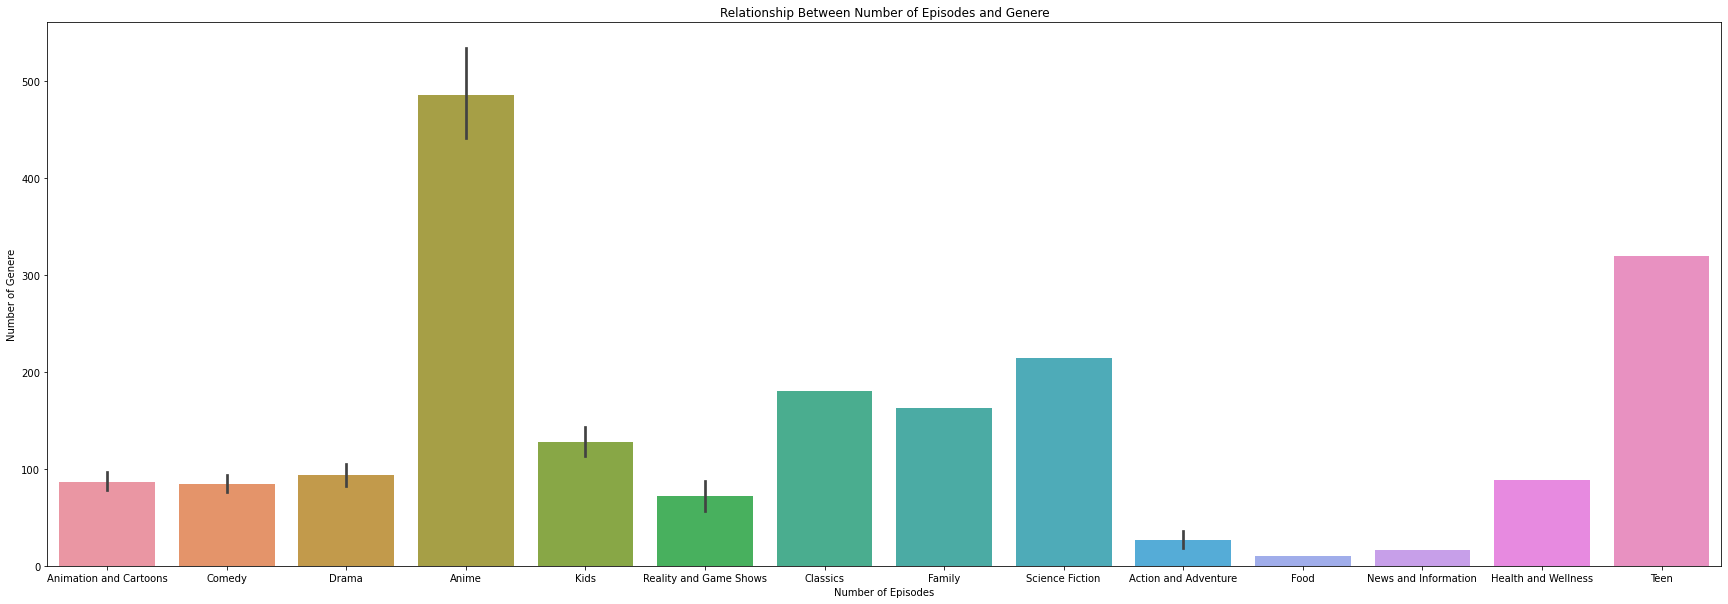

In [16]:
plt.figure(figsize=(30,10))
sns.barplot(data=hulu_data, x=hulu_data['show/genre'], y=hulu_data['show/episodes_count']) 
plt.title('Relationship Between Number of Episodes and Genere')
plt.xlabel('Number of Episodes')
plt.ylabel('Number of Genere')

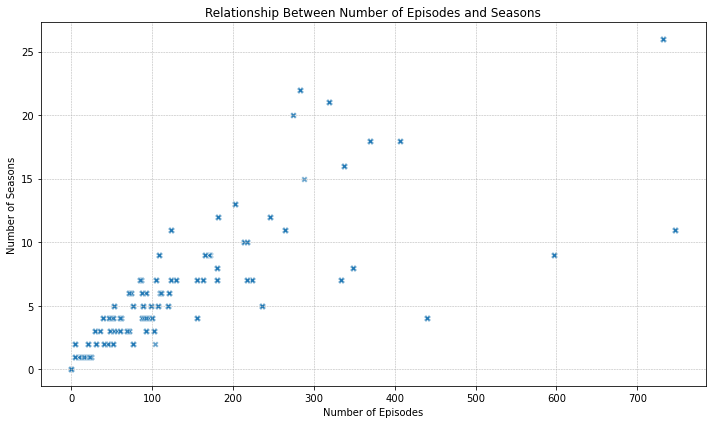

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='show/episodes_count', y='show/seasons_count', 
                marker='X',sizes=(20, 200), alpha=0.7)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.title('Relationship Between Number of Episodes and Seasons')
plt.xlabel('Number of Episodes')
plt.ylabel('Number of Seasons')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Genre')

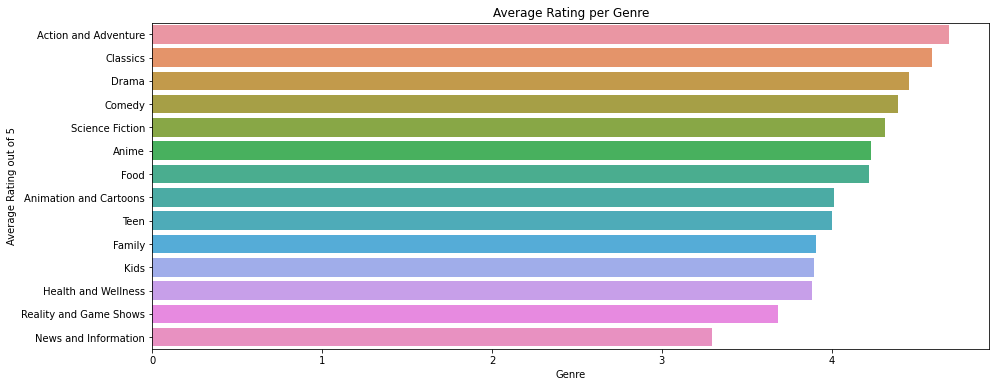

In [25]:
# Plotting
plt.figure(figsize=(15, 6))

sns.barplot(x=average_rating_per_genre.values, y=average_rating_per_genre.index)

    
plt.title('Average Rating per Genre')
plt.ylabel('Average Rating out of 5')
plt.xlabel('Genre')


### Conclusion

This analysis shows the importance of understanding viewer preferences and industry trends to stay competitive in the rapidly evolving media landscape. Hulu and content creators should focus on a mix of popular and niche genres, consider long-term storytelling in series, leverage data for targeted content promotion, and remain open to emerging trends and technologies in content production and consumption. This balanced approach can help in effectively catering to a diverse and ever-changing audience, ensuring continued success and relevance in the streaming industry.







